In [1]:
'''
Synthetic data set is from kaggle:
https://www.kaggle.com/datasets/walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning

I've included it in my repository. The kaggle page suggested investigating the relationship between 
Python/DB scores and the other variables included.
'''

"\nSynthetic data set is from kaggle:\nhttps://www.kaggle.com/datasets/walekhwatlphilip/intro-to-data-cleaning-eda-and-machine-learning\n\nI've included it in my repository. The kaggle page suggested investigating the relationship between \nPython/DB scores and the other variables included.\n"

In [2]:
import pandas

In [3]:
path = "bi.csv"
data = pandas.read_csv(path, encoding='ISO-8859-1')

In [4]:
data.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [5]:
# Checks for any duplicates. There are none.
data.loc[data.duplicated()].shape[0]

0

In [6]:
# Names are irrelavant to the test score variables. So we can drop them.
data = data.drop(columns = ['fNAME', 'lNAME'])

In [7]:
# The Python variable has two null values, but DB score and all other variables
# have no null values. So we'll keep all data rows.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            77 non-null     int64  
 1   gender         77 non-null     object 
 2   country        77 non-null     object 
 3   residence      77 non-null     object 
 4   entryEXAM      77 non-null     int64  
 5   prevEducation  77 non-null     object 
 6   studyHOURS     77 non-null     int64  
 7   Python         75 non-null     float64
 8   DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 5.5+ KB


In [8]:
# There are no blatant issues with numeric variables. The scores are all between 0 and 100,
# and the ages are from 21 to 71.
data.describe()

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,75.000000,77.000000
mean,35.207792,76.753247,149.714286,75.853333,69.467532
std,10.341966,16.475784,12.743272,15.410328,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,71.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [9]:
# This function will be used to standardize categorical variables. The item list contains all the version of a 
# category we wish to put together into one label given by the replacement item.
def standardize(data_frame, column_name, item_list, replacement_item):
    filter_array = [False] * data_frame.shape[0]
    for i, value in enumerate(data_frame[column_name]):
        filter_array[i] = value in item_list
    data_frame.loc[filter_array, column_name] = replacement_item

In [10]:
# Here we see Male, M and male are all present for what we will just call Male. And we have the same problem
# with the Female category.
data.gender.unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [11]:
# We'll use our function to fix this.
standardize(data, 'gender', ['M', 'male'], 'Male')
standardize(data, 'gender', ['F', 'female'], 'Female')

# Now we just have Male and Female.
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [12]:
# We found a lowercase norway in our country variable, and Rsa and South Africa are the same country.
data.country.unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [13]:
data.loc[data['country'] == 'norway', 'country'] = 'Norway'
data.loc[data['country'] == 'Rsa', 'country'] = 'South Africa'

data.country.unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Norge', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'UK', 'Somali', 'Nigeria',
       'Germany', 'France'], dtype=object)

In [14]:
# There are multiple version of the BI Residence category in our data set.
data.residence.unique()

array(['Private', 'Sognsvann', 'BI Residence', 'BI-Residence',
       'BIResidence', 'BI_Residence'], dtype=object)

In [15]:
standardize(data, 'residence', ['BI-Residence', 'BIResidence', 'BI_Residence'], 'BI Residence')
data.residence.unique()

array(['Private', 'Sognsvann', 'BI Residence'], dtype=object)

In [16]:
# The Diploma, High School and Bachelors category all need to be standardized.
data.prevEducation.unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [17]:
standardize(data, 'prevEducation', ['diploma', 'DIPLOMA', 'Diplomaaa'], 'Diploma')
data.loc[data['prevEducation'] == 'HighSchool', 'prevEducation'] = 'High School'
data.loc[data['prevEducation'] == 'Barrrchelors', 'prevEducation'] = 'Bachelors'

data.prevEducation.unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

In [18]:
# Check to see if standardizing has resulted in any duplicates that couldn't be detected before.
# There are still none.
data.loc[data.duplicated()].shape[0]

0

In [19]:
data.head()

,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,44,Female,Norway,Private,72,Masters,158,59.0,55
1,60,Male,Kenya,Private,79,Diploma,150,60.0,75
2,25,Male,Uganda,Sognsvann,55,High School,130,74.0,50
3,22,Female,South Africa,Sognsvann,40,High School,120,NaN,44
4,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [20]:
# The data set creator suggested investigating which variables are the most related to Python and DB scores
# with the purpose of determining good admission criteria.

In [21]:
# We need to create dummy variables for the catergorical variables.
dummy_variables = pandas.get_dummies(data[['gender', 'country', 'residence', 'prevEducation']]).astype(int)

In [22]:
# Then we replace the original columns with the dummy variables so we can use them for numeric calculations.
numeric_data = data.drop(columns=['gender', 'prevEducation', 'country', 'residence'])
numeric_data = pandas.concat([numeric_data, dummy_variables], axis=1)

In [23]:
numeric_data.head()

,Age,entryEXAM,studyHOURS,Python,DB,gender_Female,gender_Male,country_Denmark,country_France,country_Germany,...,country_UK,country_Uganda,residence_BI Residence,residence_Private,residence_Sognsvann,prevEducation_Bachelors,prevEducation_Diploma,prevEducation_Doctorate,prevEducation_High School,prevEducation_Masters
0,44,72,158,59.0,55,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,60,79,150,60.0,75,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,25,55,130,74.0,50,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
3,22,40,120,NaN,44,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,23,65,122,91.0,80,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [24]:
# One simple way to find variables that are related to test scores is to look for strong correlations.
correlations = numeric_data.corr()

In [25]:
# Correlations with Python variable
correlations.drop(columns=['DB']).loc['Python'].sort_values()

country_Nigeria             -0.268745
prevEducation_High School   -0.246551
prevEducation_Diploma       -0.164513
residence_BI Residence      -0.087476
country_Italy               -0.074107
country_Norway              -0.066823
country_France              -0.041667
residence_Private           -0.030112
Age                         -0.014608
country_Kenya               -0.011379
gender_Male                 -0.010809
country_Uganda              -0.005479
prevEducation_Doctorate     -0.004423
gender_Female                0.010809
country_Somali               0.023212
country_Spain                0.034026
country_Netherlands          0.039432
country_Denmark              0.082685
country_Norge                0.092245
country_UK                   0.098905
country_South Africa         0.115028
country_Germany              0.148642
residence_Sognsvann          0.164013
prevEducation_Masters        0.181469
prevEducation_Bachelors      0.191552
entryEXAM                    0.787550
studyHOURS  

In [26]:
# Correlations with DB variable.
correlations.drop(columns=['Python']).loc['DB'].sort_values()

gender_Female               -0.278342
prevEducation_High School   -0.272144
country_France              -0.245754
country_Spain               -0.105833
country_South Africa        -0.072059
country_Norge               -0.070952
country_Netherlands         -0.047935
residence_BI Residence      -0.045099
country_Uganda              -0.034132
prevEducation_Diploma       -0.011871
country_Italy               -0.009336
prevEducation_Doctorate      0.005177
country_Kenya                0.006335
residence_Sognsvann          0.009288
country_Norway               0.032561
residence_Private            0.038105
country_Somali               0.048562
country_Germany              0.049961
prevEducation_Bachelors      0.057873
country_Nigeria              0.077511
Age                          0.099454
country_UK                   0.120935
country_Denmark              0.164358
prevEducation_Masters        0.229853
gender_Male                  0.278342
studyHOURS                   0.466043
entryEXAM   

In [27]:
# The variables that are correlated the strongest with the test scores are the entrance exam scores and 
# study hours variables. Thus these are likely to be the best variables to use for admission requirements.
# And worth noting is that the correlations are stronger for Python scores than for DB scores.

In [34]:
# We should also create plots to visualize the relationships.
from matplotlib.pyplot import subplots

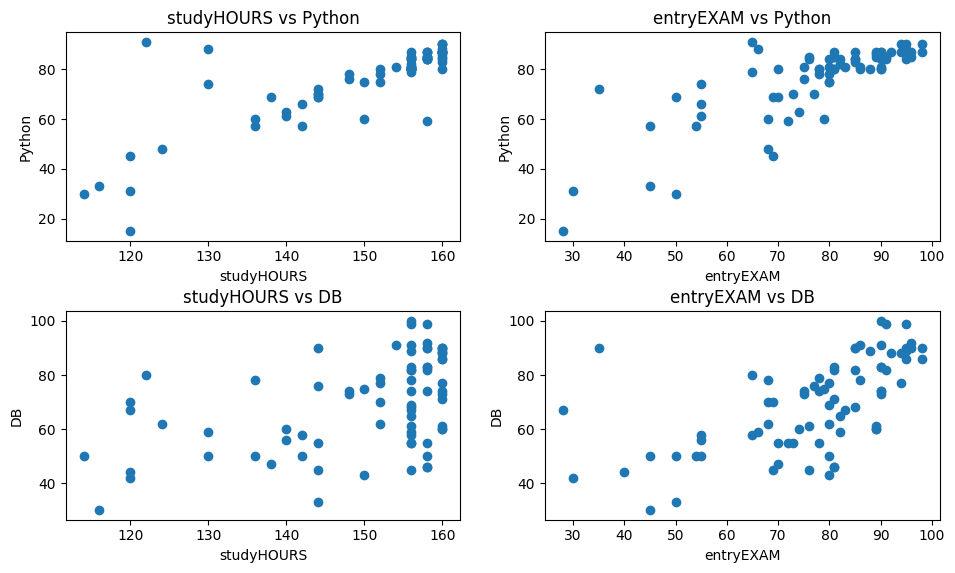

In [46]:
fig, axes = subplots(2, 2, figsize=(10, 6))
independent_variable = ['Python', 'DB']
dependent_variable = ['studyHOURS', 'entryEXAM']
fig.tight_layout(pad=3.0)
for i in range(2):
    for j in range(2):
        x = dependent_variable[j]
        y = independent_variable[i]
        axes[i][j].scatter(numeric_data[x], numeric_data[y])
        axes[i][j].set_xlabel(x)
        axes[i][j].set_ylabel(y)
        axes[i][j].set_title(x + ' vs ' + y)

In [ ]:
# From the plots, it's clear that the relationship between DB and study hours is weaker than for the
# other relationships of interest.

In [28]:
'''
It remains possible that the study hours and entry exam variables are correlated enough with each other to make
both variables seem important to the test scores while potentially only one of them truly is (similar to 
how summer weather makes ice cream sales seem to be correlated with shark attacks).

One way to eliminate this possibility would be to use multiple linear regression and see which variables end up 
having low p-values when predicting test scores instead. That's more technical than 
I wish to get in this project. But I did try it, and the result was both variables ended up having low p-values
for both Python and DB scores. So it wouldn't change much.
'''

"\nIt remains possible that the study hours and entry exam variables are correlated enough with each other to make\nboth seem important to the test scores while only one of them truly is (similar to how summer weather makes \nice cream sales seem to be correlated with shark attacks).\n\nOne way to eliminate this possibility would be to use linear regression and see which variables end up \nbeing significant when predicting test scores instead. But that's more technical than I wish to get in this \nproject. And when I tried it, it didn't change the results.\n"

In [29]:
'''
The data set creator also suggested seeing which categories perform the worst in test scores to find at-risk
student groups for extra support.

The most negatively correlated dummy variables with python scores were High School and Nigeria.

And for DB scores, the most negatively correlated dummy variables were Female, High School and France.

But for both Python and DB scores, the correlations aren't very strong.
'''

'\nThe data set creator also suggested seeing which categories perform the worst in test scores to find at-risk\nstudent groups for extra support.\n\nThe most negatively correlated dummy variables with python scores were High School and Nigeria.\n\nAnd for DB scores, the most negatively correlated dummy variables were Female, High School and France.\n'